In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# from InfoShares
from InfoShares.core import *
from InfoShares.tools import *


def data_loader():

    nav = pd.read_pickle("Data/Financial/Funds/fund_nav.pkl")

    nav_ = nav.set_index(['ticker','endDate']).loc['510050']['NAV']
    nav_.index = pd.DatetimeIndex(nav_.index)

    price = pd.read_pickle("InfoShares/data/50etf_price.pkl")

    data = pd.concat([nav_,price],axis=1).dropna()
    return data


data = data_loader()

test_data = data.copy().reset_index(drop=True)
test_data.columns = ['NAV',"Price"]


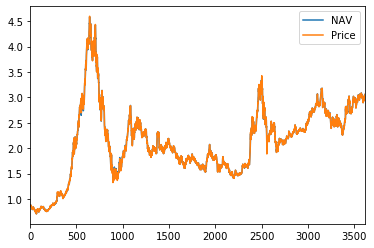

In [2]:
%matplotlib inline
test_data.plot()

In [3]:
test_data.head()

,NAV,Price
0,0.878,0.876
1,0.877,0.876
2,0.878,0.880
3,0.869,0.872
4,0.866,0.867


In [4]:
beforehand_test(test_data.pct_change()[1:])


,NAV,Price
count,3.616000e+03,3.616000e+03
mean,4.881223e-04,4.989576e-04
std,1.689595e-02,1.749994e-02
min,-9.450945e-02,-9.984639e-02
25%,-7.022394e-03,-7.122968e-03
50%,4.211428e-04,0.000000e+00
75%,8.405044e-03,8.338559e-03
max,9.137615e-02,1.002317e-01
skew,-1.857702e-01,2.824051e-03
kuro,3.861159e+00,4.751288e+00


In [5]:
pair_test(test_data.pct_change()[1:])


,statistic,p
T-test,-0.026785,0.978632
Levene,0.490585,0.483689
KS,0.013551,0.892180


In [6]:
coint_test(test_data,signif=0.05,output="standard",rule="bic")[0]


,trace,Maxeig
1,82.1864*,78.5453*
2,3.641,3.641


In [7]:
def calc_information_shares(test_data):
    model = InfoShares(test_data,'aic',maxLag=5,deterministic='ci')
    res = model.fit()
    return pd.Series(res.MInfoShares.A1,index = test_data.columns)

In [8]:
calc_information_shares(test_data)

NAV      0.542541
Price    0.457459
dtype: float64